In [1]:
import pandas as pd
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [2]:
data.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [3]:
import numpy as np

In [4]:
data[['Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI','Pedigree']] = data[['Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI','Pedigree']].replace(0,np.NaN)

In [5]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,NaN,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,NaN,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,NaN,NaN,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
data.isnull().sum()

Number_pregnant            0
Glucose_concentration      5
Blood_pressure            35
Triceps                  227
Insulin                  374
BMI                       11
Pedigree                   1
Age                        0
Class                      0
Group                      0
dtype: int64

In [7]:
data['Glucose_concentration'].fillna(data['Glucose_concentration'].mean(), inplace = True)
data['Blood_pressure'].fillna(data['Blood_pressure'].mean(), inplace = True)
data['Triceps'].fillna(data['Triceps'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)
data['Pedigree'].fillna(data['Pedigree'].median(), inplace = True)

In [8]:
data.isnull().sum()

Number_pregnant          0
Glucose_concentration    0
Blood_pressure           0
Triceps                  0
Insulin                  0
BMI                      0
Pedigree                 0
Age                      0
Class                    0
Group                    0
dtype: int64

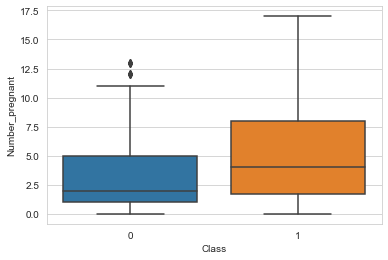

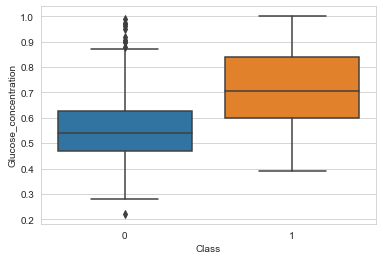

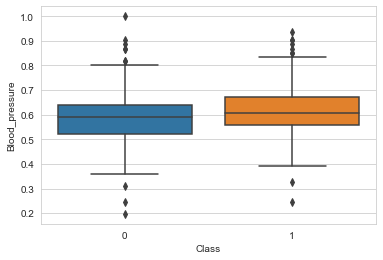

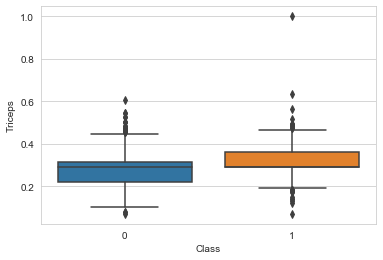

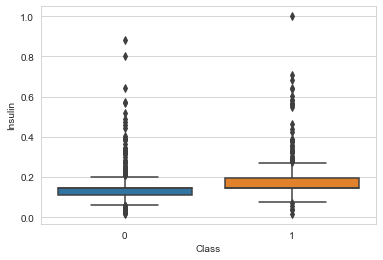

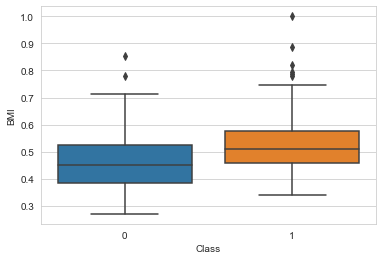

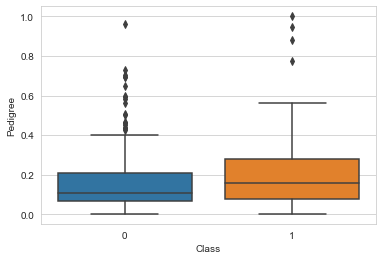

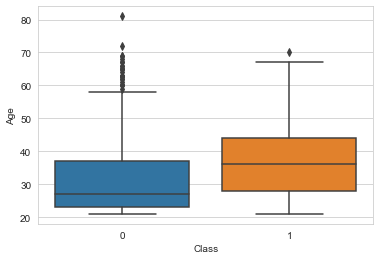

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_box(data, cols, col_x = 'Class'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
 'Insulin', 'BMI', 'Pedigree', 'Age']
plot_box(data, num_cols)

In [10]:
X=data[num_cols]
y=data['Class']

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 11),'criterion':['entropy','gini']}
        
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
tree.best_estimator_

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7204724409448819
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       168
           1       0.57      0.67      0.62        86

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.73      0.72      0.73       254



In [23]:
from sklearn.tree import export_graphviz

In [32]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [33]:
tree_dot = export_graphviz(
tree,
out_file=None, # or out_file=”iris_tree.dot”
feature_names=num_cols,
class_names='Class',
rounded=True,
filled=True
)
print(tree_dot)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Glucose_concentration <= 1.079\ngini = 0.457\nsamples = 514\nvalue = [332, 182]\nclass = C", fillcolor="#f3c6a6"] ;
1 [label="Age <= -0.233\ngini = 0.382\nsamples = 432\nvalue = [321, 111]\nclass = C", fillcolor="#eead7d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Glucose_concentration <= 0.191\ngini = 0.24\nsamples = 251\nvalue = [216, 35]\nclass = C", fillcolor="#e99559"] ;
1 -> 2 ;
3 [label="BMI <= 1.891\ngini = 0.153\nsamples = 203\nvalue = [186, 17]\nclass = C", fillcolor="#e78d4b"] ;
2 -> 3 ;
4 [label="gini = 0.13\nsamples = 200\nvalue = [186, 14]\nclass = C", fillcolor="#e78a48"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = l", fillcolor="#399de5"] ;
3 -> 5 ;
6 [label="Insulin <= 0.676\ngini = 0.469\nsamples = 48\nvalue = [30, 18]\nclass = C", fillcolor="#f5cdb0"] ;
2 -> 6 ;
7 [label="gini = 0